In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Hedonic Regression using AirBnB reviews 

##Load and Manipulate Listings Data

In [256]:
df_listings = pd.read_csv('chicago_listings.csv')
df_listings = df_listings[(df_listings.number_of_reviews>2) & (df_listings.number_of_reviews<=400)].reset_index(drop=True)

In [257]:
df_listings['price_num'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)
df_listings[['bedrooms', 'beds']] = df_listings[['bedrooms', 'beds']].fillna(0)

#df_listings['price_num'] = [float(word[1:]) for word in df_listings.price]
# df_listings.bedrooms.fillna(0, inplace=True)
# df_listings.beds.fillna(0, inplace=True)

In [258]:
df_listings = df_listings[(df_listings.price_num<1000)].reset_index(drop=True)

In [259]:

df_listings['bathrooms_text'].fillna('0 baths', inplace=True)
#bathroooms column to numbers

def extract_bath_count(text):
    match = re.search(r'(\d+\.?\d*)', text)  # Finds numbers (e.g., '1.5', '2', etc.)
    if match:
        return float(match.group(1))  # Convert found number to float
    elif 'half' in text.lower():  # 'half-bath' cases
        return 0.5
    else:
        return 0  # Default for unexpected cases


# bath_num_dict = {'1 bath':1, 
#  '2 baths':2, 
#  '6.5 baths':6.5, 
#  '3 shared baths':3, 
#  '2.5 baths':2.5,
#  '1 private bath':1, 
#  '1 shared bath':1, 
#  '3 baths':3, 
#  '2.5 shared baths':2.5,
#  '3.5 baths':3.5,
#  '1.5 baths':1.5,
#  '4.5 baths':4.5,
#  '2 shared baths':2,
#  '1.5 shared baths':1.5,
#  '5 baths':5,
#  '4 baths':4,
#  '11 shared baths':11,
#  '11.5 shared baths':11.5,
#  'Half-bath':0.5,
#  '7 baths':7,
#  '6 baths':6,
#  '4 shared baths':4,
#  'Private half-bath':0.5,
#  '0 shared baths':0,
#  'Shared half-bath':0.5,
#  '0 baths':0,
#  '8 shared baths':8,
#  '5.5 baths':5.5
# }
# df_listings.bathrooms_text.fillna('0 baths', inplace=True)
# df_listings['bathroom_num'] = df_listings.bathrooms_text.apply(lambda x: bath_num_dict[x])

/tmp/ipykernel_40755/319399318.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listings['bathrooms_text'].fillna('0 baths', inplace=True)


In [260]:
#df_listings

In [261]:
neigh_dummies = pd.get_dummies(df_listings.neighbourhood_cleansed)
neigh_dummies

,Albany Park,Archer Heights,Armour Square,Ashburn,Auburn Gresham,Austin,Avalon Park,Avondale,Belmont Cragin,Beverly,Bridgeport,Brighton Park,Burnside,Calumet Heights,Chatham,Chicago Lawn,Clearing,Douglas,Dunning,East Garfield Park,East Side,Edgewater,Edison Park,Englewood,Forest Glen,Fuller Park,Gage Park,Garfield Ridge,Grand Boulevard,Greater Grand Crossing,Hegewisch,Hermosa,Humboldt Park,Hyde Park,Irving Park,Jefferson Park,Kenwood,Lake View,Lincoln Park,Lincoln Square,Logan Square,Loop,Lower West Side,Mckinley Park,Montclare,Morgan Park,Mount Greenwood,Near North Side,Near South Side,Near West Side,New City,North Center,North Lawndale,North Park,Norwood Park,Oakland,Ohare,Portage Park,Pullman,Rogers Park,Roseland,South Chicago,South Deering,South Lawndale,South Shore,Uptown,Washington Heights,Washington Park,West Elsdon,West Englewood,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4657,False,False,False,Fa

In [262]:
for neigh_name in neigh_dummies.columns:
    df_listings[neigh_name] = neigh_dummies[neigh_name]


In [263]:
#df_listings = pd.concat((df_listings, neigh_dummies), axis=0)

In [264]:
#df_listings.head()

##Load and Manipulate Reviews Data

In [265]:
df_reviews = pd.read_csv('chicago_reviews.csv')

In [266]:
df_summ = df_reviews.groupby('listing_id').comments.sum().reset_index()

In [267]:
df_comb = pd.merge(df_listings, df_summ, how='left', left_on='id', right_on='listing_id' )

In [268]:
df_comb.shape

(4661, 153)

In [269]:
#df_comb.head()

In [270]:
#df_comb.tail()

In [271]:
from sklearn.utils import shuffle
df_comb = shuffle(df_comb,random_state=42).reset_index(drop=True)


In [272]:
#for i,doc in enumerate(df_comb.comments):
   # print(i, len(doc))

In [273]:
df_comb.iloc[696:699,:]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,Albany Park,Archer Heights,Armour Square,Ashburn,Auburn Gresham,Austin,Avalon Park,Avondale,Belmont Cragin,Beverly,Bridgeport,Brighton Park,Burnside,Calumet Heights,Chatham,Chicago Lawn,Clearing,Douglas,Dunning,East Garfield Park,East Side,Edgewater,Edison Park,Englewood,Forest Glen,Fuller Park,Gage Park,Garfield Ridge,Grand Boulevard,Greater Grand Crossing,Hegewisch,Hermosa,Humboldt Park,Hyde Park,Irving Park,Jefferson Park,Kenwood,Lake View,Lincoln Park,Lincoln Square,Logan Square,Loop,Lower West Side,Mckinley Park,Montclare,Morgan Park,Mount Greenwood,Near North Side,Near South Side,Near West Side,New City,North Center,North Lawndale,North Park,Norwood Park,Oakland,Ohare,Portage Park,Pullman,Rogers Park,Roseland,South Chicago,South Deering,South Lawndale,South Shore,Uptown,Washington Heights,Washington Park,West Elsdon,West Englewood,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn,listing_id,comments
696,49771548,https://www.airbnb.com/rooms/49771548,20211215062239,2021-12-15,West Loop is the Best Loop 3Bed Condo,Outstanding 3bedroom 2bath condo in the West L...,West Loop is filled with many Bars and Restaur...,https://a0.muscache.com/pictures/2fb41146-542d...,104523586,https://www.airbnb.com/users/show/104523586,Eric,2016-11-20,"Bentonville, Arkansas, United States","Lover of the beach—sleeping on the beach, snoo...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/93539...,https://a0.muscache.com/im/pictures/user/93539...,NaN,2.0,2.0,"['email', 'phone', 'facebook', 'offline_govern...",t,t,"Chicago, Illinois, United States",Near West Side,NaN,41.88333,-87.65282,Entire condominium (condo),Entire home/apt,7,NaN,2 baths,3.0,3.0,"[""Shampoo"", ""Stove"", ""Cooking basics"", ""Hot wa...",$329.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,23,53,83,173,2021-12-15,22,22,2,2021-05-31,2021-11-28,4.95,4.95,5.00,4.95,5.00,5.00,4.86,R19000042303,t,1,1,0,0,3.32,329.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,49771548,"very responsive and accomodating host. nice, c..."
697,20454596,https://www.airbnb.com/rooms/20454596,20211215062239,2021-12-15,Perfect Northside loc. Wrigley!! Free St Parking!,Airbnb Member since May 2011!! . Very clean an...,Wrigleyville<br />Lakeview<br />Boystown<br />...,https://a0.mus

In [274]:
df_train = df_comb.iloc[:-1000,:].reset_index(drop=True)
df_test = df_comb.iloc[-1000:,:].reset_index(drop=True)

In [275]:
df_train.shape, df_test.shape

((3661, 153), (1000, 153))

In [276]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Columns: 153 entries, id to comments
dtypes: bool(76), float64(20), int64(22), object(35)
memory usage: 2.4+ MB


In [277]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.preprocessing import Normalizer

In [278]:
host_name_list = df_listings.host_name.str.lower().unique()

In [279]:
'bill and ted'.split(' ') + 'bill and ted'.split(' ')

['bill', 'and', 'ted', 'bill', 'and', 'ted']

In [280]:
hn_list = []
for str1 in host_name_list:
    hn_list = hn_list + (str(str1).split(' '))

In [281]:
vectorizer = TfidfVectorizer(min_df = 20, max_df=1000, stop_words = hn_list)
count_mat_train = vectorizer.fit_transform(df_train.comments) 
count_mat_test = vectorizer.transform(df_test.comments) 

#Display the matrix as a dataframe
pd.DataFrame(count_mat_train.toarray(),  columns=vectorizer.get_feature_names_out()).head(10)

/Users/lauren.miller3/Library/Python/3.10/lib/python/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['airbnb', 'dba', 'dia', 'email', 'fang', 'firoz', 'forrest', 'go', 'jer', 'johhnie', 'jw', 'meridith', 'mr', 'ms', 'mỹ', 'phương', 'rentals', 'shih', 'tenna', 'tonya'] not in stop_words.
  warnings.warn(


,00,00am,00pm,100,1000,10am,10great,10min,10mins,10pm,11,110,11am,11pm,12,13,14,150,15min,15mins,16,17,18,18th,19,19th,1am,1pm,1st,200,2017,2018,2019,2020,2021,20min,20mins,20th,21,21st,22,23,24,24hrs,25,26,27,28,290,2am,2br,2nd,30,300,30am,30min,30mins,30pm,30th,31,33,35,36,360,3am,3pm,3rd,40,400,40min,45,48,49,4am,4pm,4th,50,500,53rd,55,5am,5min,5mins,5pm,5th,60,606,65,66,6am,6ft,6pm,6th,70,72,75,77,78,7am,7pm,80,81,85,8am,8pm,90,90s,94,95,9am,9pm,a1,ab,abandoned,aber,ability,abnb,abode,abound,abroad,absolute,abundance,abundant,ac,accents,accept,acceptable,accepted,accepting,accesible,acceso,accessed,accessibility,accessing,accessories,accident,accidentally,accomadating,accommodate,accommodated,accommodates,accommodation,accommodative,accomodate,accomodated,accomodating,accomodation,accomodations,according,accordingly,account,accounts,accueil,accueillant,accueilli,accuracy,accurately,accused,accustomed,accès,acogedor,acogedora,acquainted,act,acted,action,active,actively,activities,activity,actual,actually,ad,add,added,adding,addison,addition,additional,additionally,additions,address,addressed,addresses,addressing,adds,además,adequate,adequately,adjacent,adjoining,adjust,adjustable,adjusted,adjusting,adjustment,adjustments,admire,admiring,admit,admittedly,adorable,adorably,adored,adresse,adult,adults,advance,advantage,adventure,adventures,adventuring,adventurous,advertise,advertisement,advertising,advice,advices,advise,advised,aeropuerto,aesthetic,aesthetically,aesthetics,affect,affected,afford,affordability,affordable,afforded,afraid,african,afternoon,afternoons,afterwards,againa,againamazing,againgood,againgreat,againi,againit,againnice,against,againthe,againthis,againvery,againwe,againwonderful,age,aged,...,voiture,volume,volver,volvería,volveríamos,von,vor,vorhanden,votre,vous,vraiment,vs,waffles,wait,waited,waiting,wake,waking,walgreen,walgreens,walkability,walker,walkers,walks,walkup,walkway,wall,walls,walmart,wander,wandering,wanna,wanting,wants,war,wardrobe,ware,waren,warmed,warmer,warmest,warming,warmly,warmth,warn,warned,warning,wary,wash,washcloths,washed,washer,washing,washington,washroom,wasnt,waste,watch,watched,watching,waterfall,waterfront,watering,waters,wave,ways,weak,wealth,wear,wearing,weary,weather,web,webs,website,wedding,wednesday,wee,weed,weekday,weekdays,weekends,weeklong,weekly,weeks,weight,weird,welcomed,welcomes,wells,wenn,werden,weren,west,western,wet,wfh,whatever,whatsoever,wheel,whenever,wherever,whether,whilst,whimsical,whirlpool,whistle,whistles,white,whoever,wholefoods,wholeheartedly,whom,whose,why,wi,wicker,wide,wie,wieder,wife,wild,willing,willingness,willis,win,wind,winding,window,windows,windy,wine,winner,winning,winter,wipe,wiped,wipes,wir,wireless,wirklich,wise,wish,wished,wishes,wishing,wobbly,wohl,wohnung,woke,woken,woman,women,won,wonder,wonderfull,wonderfully,wondering,wont,wood,wooden,woodwork,word,words,wore,workable,worker,workers,workout,works,workshop,workspace,world,worlds,worn,worried,worries,worry,worrying,worse,worst,worthwhile,worthy,wouldn,wouldnt,wound,wow,wrap,wrapped,wriggly,wright,write,writing,written,wrong,wrote,würden,ya,yard,yards,yeah,year,years,yelling,yellow,yes,yet,yo,yoga,yogurt,yolk,york,yougreat,young,younger,youre,yours,yourself,youthe,youtube,yr,yum,yummy,zeit,zentrum,zero,zimmer,zip,zona,zone,zoo,zoom,zu,zum,zur,zwei,également,équipé,équipée,était,étions,été,être,ótima,único,über,все,на,очень,너무
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030643,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.040721,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015594,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.158578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.

## Dimension Reduction / Feature Extraction

In [282]:
## Again, we do a fit_transform here.  This does two things:
## 1) It learns a mapping from a vector of words to a vector of "topics" or "reduced dimensions"
## 2) It applies that transformation to the count_mat and puts the result in reduced_mat

lsa = TruncatedSVD(50)
reduced_mat_train = lsa.fit_transform(count_mat_train)
reduced_mat_test = lsa.transform(count_mat_test)

In [283]:
## This fit_transform is very simple.  It calculates the sum of squares for each row (the "fit" part) and 
## then divides each row by that amount (the "transform" part).  This just ensures that each vector has a "norm" of 1
## Vectors with a norm of 1 are easy to work with for calculating similarity.

reduced_mat_train = Normalizer(copy=False).fit_transform(reduced_mat_train)
reduced_mat_test = Normalizer(copy=False).fit_transform(reduced_mat_test)

In [284]:
count_mat_train.shape, reduced_mat_train.shape #reduced_mat is the "Tall and Skinny" matrix T

((3661, 6154), (3661, 50))

In [285]:
count_mat_test.shape, reduced_mat_test.shape 

((1000, 6154), (1000, 50))

In [286]:
lsa.components_.shape #lsa.components is the "Short and Wide" matrix W

(50, 6154)

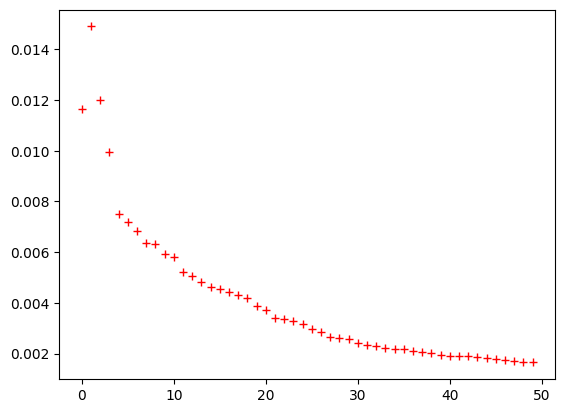

In [287]:
# This is (essentially) or eigenvalue plot (divided by the sum of eigenvalues).

plt.plot(lsa.explained_variance_ratio_,'r+')

In [288]:
pd.DataFrame(reduced_mat_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.367408,0.661759,0.254167,0.127031,0.066267,-0.003568,-0.007593,0.001084,-0.041794,-0.003864,-0.036326,-0.080031,0.019228,0.018113,0.008456,-0.108504,-0.155393,-0.048940,0.048668,-0.053826,0.003332,-0.144216,-0.007912,0.126016,-0.263857,-0.133336,0.156243,-0.103475,0.014992,0.055945,-0.048036,-0.001123,-0.030391,0.069150,0.081760,-0.024220,-0.031352,0.077408,0.067324,0.062880,-0.112829,0.090253,-0.011221,0.084017,-0.056451,-0.027860,0.099710,-0.066641,0.145207,-0.164882
1,0.624876,0.027288,-0.016031,-0.175656,0.020487,0.050461,-0.063142,0.017353,-0.057033,-0.047810,0.017726,-0.005421,0.020444,-0.048749,0.003778,-0.030224,0.012102,0.036277,0.000229,0.089716,-0.072453,0.022985,-0.131972,-0.006409,-0.175940,0.031496,0.071900,-0.149702,0.117746,0.159899,-0.165328,0.090727,-0.136963,0.034312,-0.008894,0.131118,-0.203412,0.309979,0.044590,0.037321,-0.091157,0.314722,0.095521,0.155527,-0.106764,-0.089209,-0.057465,-0.129352,0.118590,-0.146166
2,0.298264,0.010196,0.018393,-0.077241,0.300318,-0.087030,0.403722,0.162359,0.162307,0.518635,-0.016804,-0.067234,-0.148516,0.391264,0.085557,0.105226,0.129552,0.117979,0.069165,0.013522,0.094929,0.139351,-0.066443,-0.120381,-0.104791,0.057573,-0.008989,-0.002541,-0.009228,-0.070490,-0.036820,-0.009524,0.049523,-0.008253,0.014221,0.003319,0.042593,0.026446,0.027221,-0.046674,-0.048780,0.021692,0.003979,0.042793,-0.018422,0.012352,-0.001129,0.051089,0.010783,0.062255
3,0.067271,0.019918,0.008702,-0.025182,-0.049526,-0.037346,0.110720,-0.647281,0.671565,-0.184921,-0.188295,0.079997,-0.032119,0.081672,-0.039409,0.012695,-0.017019,0.023935,-0.049260,0.053471,0.065921,0.050936,0.011134,0.051382,0.032605,0.015181,0.025692,-0.016865,-0.017036,0.033917,-0.031870,-0.008330,-0.021800,0.010736,0.017711,0.007786,0.016666,-0.003353,-0.002439,-0.014932,0.020051,-0.000497,-0.004600,-0.008344,-0.003103,-0.009151,0.001795,-0.004894,0.006518,-0.008248
4,0.749786,-0.103521,0.069123,-0.317020,-0.282229,-0.059028,-0.009028,0.021416,-0.137543,-0.002705,0.056929,0.052032,-0.021778,0.155213,-0.110805,-0.011142,-0.012401,-0.020983,-0.096453,0.060208,0.140139,-0.001704,-0.139011,-0.000259,-0.005801,0.021670,0.030868,-0.232937,0.042064,-0.003238,-0.046946,-0.022665,-0.023702,0.042368,-0.003316,-0.054712,0.034133,-0.131464,-0.048355,0.079796,0.042241,-0.077552,-0.021777,-0.090948,-0.067557,0.024869,0.031757,0.031496,-0.037789,-0.077036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.584951,0.073461,-0.179862,0.078241,0.430513,-0.016371,-0.032159,-0.108062,-0.042956,-0.040229,-0.060155,-0.076798,0.080863,-0.120273,0.073212,-0.048107,0.043358,0.058366,-0.064682,0.057635,-0.171109,-0.029370,-0.101157,-0.091856,-0.182096,-0.003164,-0.141803,0.188642,-0.136291,-0.202749,-0.076303,-0.026958,-0.112407,0.077104,-0.017348,0.204214,-0.035446,0.041267,-0.066744,-0.195792,0.089095,0.074951,-0.065028,-0.054993,-0.005133,-0.039401,0.119043,0.084505,0.085130,0.002603
996,0.656061,-0.084629,-0.108537,-0.063181,-0.320795,0.071007,0.101637,-0.099554,-0.009908,0.064686,0.070989,0.022216,0.125632,0.061349,-0.084506,-0.038663,0.045073,-0.002065,-0.072443,-0.006797,-0.356570,0.055661,0.008481,-0.136763,-0.034989,-0.089622,0.058428,-0.162446,-0.260169,0.115983,0.087566,-0.109756,0.140368,-0.014148,-0.056160,-0.012395,-0.066087,-0.032688,-0.059544,-0.121361,-0.044124,-0.060226,-0.022689,0.077659,0.087557,0.016442,-0.076192,-0.025138,0.082577,0.062972
997,0.310237,0.693411,0.270619,0.180357,0.036531,-0.016212,-0.002967,-0.038317,-0.037213,0.078863,-0.012415,0.051449,0.214371,-0.047835,-0.104177,0.046892,-0.049896,-0.023254,0.023875,-0.122294,0.114791,-0.190563,0.057835,0.110319,-0.231509,-0.219435,0.122884,0.024716,0.039841,0.068862,-0.020463,0.03

## Explore the most important words in each topic / dimension

In [289]:
## This just gives us the column names of our terms.
terms = np.array(vectorizer.get_feature_names_out())

In [290]:
## This is a simple convenience function which gets the highest valued terms for each topic

def get_topical_terms(topic_mat, topic_num, term_vec, num_terms=25):
    return term_vec[np.argsort(-topic_mat[topic_num,:])][:num_terms]

In [291]:
## Print the highest valued terms for each of the first 10 topics

for i in range(50):
    print("topic {}".format(i))
    print(get_topical_terms(lsa.components_,i,terms, 35))

topic 0
['view' 'square' 'logan' 'lincoln' 'lake' 'wicker' 'basement' 'la'
 'snacks' 'studio' 'field' 'garage' 'dog' 'him' 'views' 'upstairs' 'muy'
 'kids' 'bathrooms' 'loud' 'stairs' 'charming' 'loft' 'tips' 'brown'
 'neighbors' 'beautifully' 'appointed' 'husband' 'deck' 'en' 'airport'
 'gorgeous' 'bar' 'dryer']
topic 1
['view' 'views' 'rooftop' 'lake' 'staff' 'michigan' 'pool' 'balcony'
 'skyline' 'roof' 'deck' 'gym' 'pier' 'navy' 'desk' 'breathtaking'
 'service' 'magnificent' 'lobby' 'windows' 'team' 'stunning' 'millennium'
 'spectacular' 'sunrise' 'grant' 'penthouse' 'elevator' 'mile' 'studio'
 'mccormick' 'museum' 'ave' 'foods' 'hyde']
topic 2
['logan' 'square' 'view' 'views' 'rooftop' 'lincoln' 'studio' '606' 'deck'
 'balcony' 'roof' 'lake' 'skyline' 'wicker' 'pool' 'gorgeous' 'garage'
 'beautifully' 'appointed' 'staff' 'california' 'trail' 'loft' 'bucktown'
 'milwaukee' 'stunning' 'michigan' 'hip' 'parks' 'outdoor' 'breathtaking'
 'wine' 'designed' 'ave' 'cafes']
topic 3
['la' '

In [292]:
#df_train.head()

In [293]:
reduced_mat_train_df = pd.DataFrame(reduced_mat_train)#, columns=['comment_feat_'+str(i) for i in range(50)])
reduced_mat_test_df = pd.DataFrame(reduced_mat_test)#, columns=['comment_feat_'+str(i) for i in range(50)])

In [294]:
#reduced_mat_test_df.head(30)

In [295]:
col_list = ['comment_feat_'+str(i) for i in range(50)]
reduced_mat_train_df.columns=col_list
reduced_mat_test_df.columns=col_list


In [296]:
#df_test.head()

In [297]:
#reduced_mat_test_df.head()

In [298]:
df_train_aug = pd.concat((df_train, reduced_mat_train_df),axis=1)

In [299]:
#df_train_aug.head()

In [300]:
df_test_aug = pd.concat((df_test, reduced_mat_test_df),axis=1)

In [301]:
#df_test_aug

In [302]:
neigh_list = list(df_listings.neighbourhood_cleansed.value_counts().index)
neigh_list

['West Town',
 'Lake View',
 'Near North Side',
 'Logan Square',
 'Near West Side',
 'Lincoln Park',
 'Uptown',
 'Loop',
 'Lower West Side',
 'Irving Park',
 'Edgewater',
 'Near South Side',
 'Bridgeport',
 'Avondale',
 'Rogers Park',
 'North Center',
 'Lincoln Square',
 'Grand Boulevard',
 'Hyde Park',
 'Humboldt Park',
 'East Garfield Park',
 'West Ridge',
 'South Shore',
 'Portage Park',
 'Woodlawn',
 'Armour Square',
 'Albany Park',
 'Douglas',
 'Kenwood',
 'Austin',
 'Mckinley Park',
 'Jefferson Park',
 'North Lawndale',
 'Greater Grand Crossing',
 'South Lawndale',
 'Dunning',
 'Norwood Park',
 'North Park',
 'Calumet Heights',
 'Brighton Park',
 'Washington Park',
 'West Garfield Park',
 'Hermosa',
 'South Chicago',
 'Belmont Cragin',
 'New City',
 'Oakland',
 'Englewood',
 'Pullman',
 'Forest Glen',
 'Ashburn',
 'Garfield Ridge',
 'Ohare',
 'Roseland',
 'Washington Heights',
 'Chatham',
 'Beverly',
 'Montclare',
 'West Pullman',
 'Morgan Park',
 'Archer Heights',
 'Mount Greenw

In [303]:
feat_list = ['bedrooms', 'beds', 'bathroom_num'] + col_list[:10] + neigh_list[:20]
feat_list

['bedrooms',
 'beds',
 'bathroom_num',
 'comment_feat_0',
 'comment_feat_1',
 'comment_feat_2',
 'comment_feat_3',
 'comment_feat_4',
 'comment_feat_5',
 'comment_feat_6',
 'comment_feat_7',
 'comment_feat_8',
 'comment_feat_9',
 'West Town',
 'Lake View',
 'Near North Side',
 'Logan Square',
 'Near West Side',
 'Lincoln Park',
 'Uptown',
 'Loop',
 'Lower West Side',
 'Irving Park',
 'Edgewater',
 'Near South Side',
 'Bridgeport',
 'Avondale',
 'Rogers Park',
 'North Center',
 'Lincoln Square',
 'Grand Boulevard',
 'Hyde Park',
 'Humboldt Park']

In [304]:
df_train_aug['bathroom_num'] = df_train_aug['bathrooms_text'].apply(extract_bath_count)
df_test_aug['bathroom_num'] = df_test_aug['bathrooms_text'].apply(extract_bath_count)

In [305]:
X_train = df_train_aug.loc[:,feat_list]
y_train = df_train_aug.price_num

X_test = df_test_aug.loc[:,feat_list]
y_test = df_test_aug.price_num

##Run Regression

In [306]:
from sklearn.linear_model import LinearRegression

In [307]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [308]:
list(zip(feat_list, lr1.coef_))

[('bedrooms', np.float64(28.98919676337378)),
 ('beds', np.float64(17.204183816279716)),
 ('bathroom_num', np.float64(26.87686577484158)),
 ('comment_feat_0', np.float64(-39.78423380084552)),
 ('comment_feat_1', np.float64(49.59338622035436)),
 ('comment_feat_2', np.float64(64.22346467240077)),
 ('comment_feat_3', np.float64(-96.98121301752309)),
 ('comment_feat_4', np.float64(-37.89571544415687)),
 ('comment_feat_5', np.float64(27.332300701881568)),
 ('comment_feat_6', np.float64(-32.541420060324214)),
 ('comment_feat_7', np.float64(61.80563902014279)),
 ('comment_feat_8', np.float64(42.163142695989386)),
 ('comment_feat_9', np.float64(-13.344248473016808)),
 ('West Town', np.float64(24.70043400217537)),
 ('Lake View', np.float64(15.114901698745284)),
 ('Near North Side', np.float64(70.81765305647126)),
 ('Logan Square', np.float64(20.568131639791197)),
 ('Near West Side', np.float64(25.827945575611793)),
 ('Lincoln Park', np.float64(26.960213909827576)),
 ('Uptown', np.float64(45.823

(array([ 125.,  116.,  516., 2069.,  387.,  143.,   89.,   74.,   89.,
          53.]),
 array([-0.46190028, -0.33521514, -0.20853001, -0.08184487,  0.04484026,
         0.1715254 ,  0.29821054,  0.42489567,  0.55158081,  0.67826595,
         0.80495108]),
 <BarContainer object of 10 artists>)

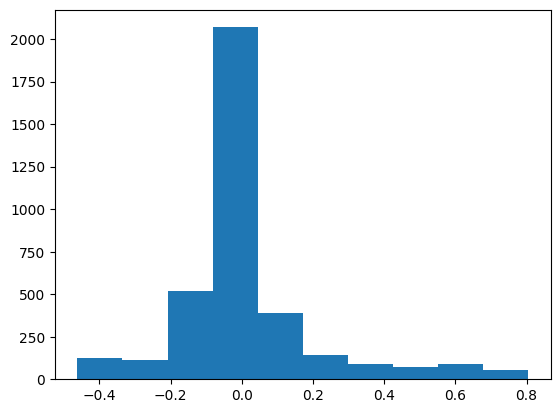

In [309]:
plt.hist(df_train_aug.comment_feat_1)

In [310]:
df_train.neighbourhood_cleansed.value_counts()

neighbourhood_cleansed
West Town                 422
Lake View                 336
Near North Side           284
Logan Square              268
Near West Side            181
Lincoln Park              174
Uptown                    126
Loop                      120
Lower West Side           114
Irving Park               107
Near South Side            94
Edgewater                  92
Bridgeport                 90
Rogers Park                83
North Center               81
Avondale                   77
Grand Boulevard            61
Lincoln Square             60
Hyde Park                  55
Humboldt Park              49
Portage Park               48
South Shore                47
East Garfield Park         46
West Ridge                 46
Woodlawn                   41
Albany Park                37
Armour Square              35
Douglas                    34
Austin                     31
Kenwood                    30
Mckinley Park              29
Greater Grand Crossing     25
South Lawndale   

In [311]:
#df_train.comments.iloc[27]

In [312]:
df_train_aug.iloc[27,:]

id                                                                                         542067
listing_url                                                   https://www.airbnb.com/rooms/542067
scrape_id                                                                          20211215062239
last_scraped                                                                           2021-12-15
name                                                           Logan Square Modern Vintage Garden
description                                     This two-bedroom, cozy ground-level flat with ...
neighborhood_overview                           The apartment is in Logan Square. It's one of ...
picture_url                                     https://a0.muscache.com/pictures/50800015/9d1f...
host_id                                                                                   2273840
host_url                                                https://www.airbnb.com/users/show/2273840
host_name           

In [313]:
vals27 = X_train.iloc[27]
vals27

bedrooms                2.0
beds                    3.0
bathroom_num            1.0
comment_feat_0     0.531103
comment_feat_1    -0.455676
comment_feat_2     0.588971
comment_feat_3     0.311386
comment_feat_4    -0.121404
comment_feat_5    -0.072065
comment_feat_6    -0.065375
comment_feat_7    -0.032586
comment_feat_8    -0.038393
comment_feat_9     0.041014
West Town             False
Lake View             False
Near North Side       False
Logan Square           True
Near West Side        False
Lincoln Park          False
Uptown                False
Loop                  False
Lower West Side       False
Irving Park           False
Edgewater             False
Near South Side       False
Bridgeport            False
Avondale              False
Rogers Park           False
North Center          False
Lincoln Square        False
Grand Boulevard       False
Hyde Park             False
Humboldt Park         False
Name: 27, dtype: object

In [314]:
list(zip(feat_list, lr1.coef_)), lr1.intercept_

([('bedrooms', np.float64(28.98919676337378)),
  ('beds', np.float64(17.204183816279716)),
  ('bathroom_num', np.float64(26.87686577484158)),
  ('comment_feat_0', np.float64(-39.78423380084552)),
  ('comment_feat_1', np.float64(49.59338622035436)),
  ('comment_feat_2', np.float64(64.22346467240077)),
  ('comment_feat_3', np.float64(-96.98121301752309)),
  ('comment_feat_4', np.float64(-37.89571544415687)),
  ('comment_feat_5', np.float64(27.332300701881568)),
  ('comment_feat_6', np.float64(-32.541420060324214)),
  ('comment_feat_7', np.float64(61.80563902014279)),
  ('comment_feat_8', np.float64(42.163142695989386)),
  ('comment_feat_9', np.float64(-13.344248473016808)),
  ('West Town', np.float64(24.70043400217537)),
  ('Lake View', np.float64(15.114901698745284)),
  ('Near North Side', np.float64(70.81765305647126)),
  ('Logan Square', np.float64(20.568131639791197)),
  ('Near West Side', np.float64(25.827945575611793)),
  ('Lincoln Park', np.float64(26.960213909827576)),
  ('Uptown

In [315]:
vals27 * lr1.coef_

bedrooms           57.978394
beds               51.612551
bathroom_num       26.876866
comment_feat_0    -21.129535
comment_feat_1    -22.598534
comment_feat_2     37.825751
comment_feat_3    -30.198639
comment_feat_4      4.600681
comment_feat_5     -1.969712
comment_feat_6      2.127404
comment_feat_7     -2.014029
comment_feat_8     -1.618779
comment_feat_9     -0.547302
West Town                0.0
Lake View                0.0
Near North Side          0.0
Logan Square       20.568132
Near West Side           0.0
Lincoln Park             0.0
Uptown                   0.0
Loop                     0.0
Lower West Side          0.0
Irving Park             -0.0
Edgewater                0.0
Near South Side          0.0
Bridgeport               0.0
Avondale                -0.0
Rogers Park              0.0
North Center             0.0
Lincoln Square           0.0
Grand Boulevard          0.0
Hyde Park                0.0
Humboldt Park            0.0
Name: 27, dtype: object

In [316]:
np.sum(vals27 * lr1.coef_) + lr1.intercept_

np.float64(141.8205441176458)

In [317]:
y_train.iloc[27]

np.float64(174.0)

In [318]:
train_preds = lr1.predict(X_train)
test_preds = lr1.predict(X_test)

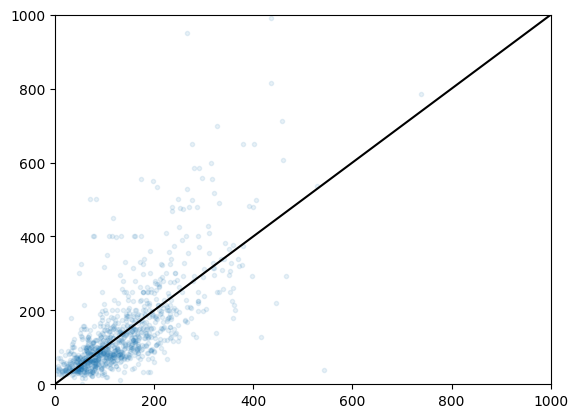

In [319]:
plt.scatter(test_preds, y_test, marker = '.', alpha=.1)
plt.xlim([0,1000])
plt.ylim([0,1000])
plt.plot([0,1000],[0,1000], color = 'k')

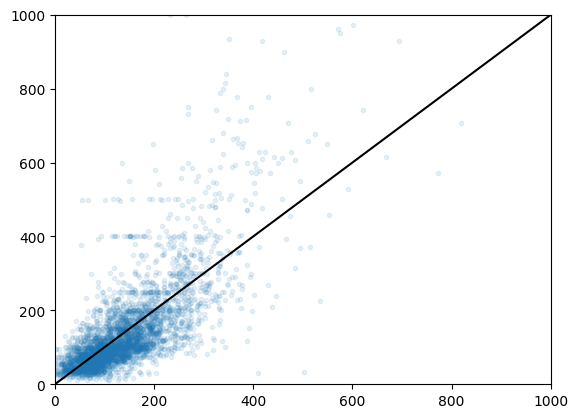

In [320]:
plt.scatter(train_preds, y_train, marker = '.', alpha=.1)
plt.xlim([0,1000])
plt.ylim([0,1000])
plt.plot([0,1000],[0,1000], color = 'k')

In [321]:
from sklearn.metrics import r2_score

In [322]:
r2_score(y_test, test_preds)

0.4935884789070665

In [323]:
r2_score(y_train, train_preds)

0.540332484547826

In [324]:
print(X_train.dtypes)
print(y_train.dtypes)

bedrooms           float64
beds               float64
bathroom_num       float64
comment_feat_0     float64
comment_feat_1     float64
comment_feat_2     float64
comment_feat_3     float64
comment_feat_4     float64
comment_feat_5     float64
comment_feat_6     float64
comment_feat_7     float64
comment_feat_8     float64
comment_feat_9     float64
West Town             bool
Lake View             bool
Near North Side       bool
Logan Square          bool
Near West Side        bool
Lincoln Park          bool
Uptown                bool
Loop                  bool
Lower West Side       bool
Irving Park           bool
Edgewater             bool
Near South Side       bool
Bridgeport            bool
Avondale              bool
Rogers Park           bool
North Center          bool
Lincoln Square        bool
Grand Boulevard       bool
Hyde Park             bool
Humboldt Park         bool
dtype: object
float64


In [325]:
print(X_train.dtypes)  # Should all be float64 or int64
print(y_train.dtype)   # Should be float64 or int64

bedrooms           float64
beds               float64
bathroom_num       float64
comment_feat_0     float64
comment_feat_1     float64
comment_feat_2     float64
comment_feat_3     float64
comment_feat_4     float64
comment_feat_5     float64
comment_feat_6     float64
comment_feat_7     float64
comment_feat_8     float64
comment_feat_9     float64
West Town             bool
Lake View             bool
Near North Side       bool
Logan Square          bool
Near West Side        bool
Lincoln Park          bool
Uptown                bool
Loop                  bool
Lower West Side       bool
Irving Park           bool
Edgewater             bool
Near South Side       bool
Bridgeport            bool
Avondale              bool
Rogers Park           bool
North Center          bool
Lincoln Square        bool
Grand Boulevard       bool
Hyde Park             bool
Humboldt Park         bool
dtype: object
float64


In [326]:


import numpy as np
import pandas as pd
import statsmodels.api as sm

# Ensure X_train is a DataFrame
X_train = pd.DataFrame(X_train)

# Convert boolean columns to integers (True → 1, False → 0)
X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})

# Convert all columns to numeric, coercing errors (turns non-numeric into NaN)
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Drop any remaining NaN values
X_train = X_train.dropna(axis=1)  # Drop columns with NaN (if any)
y_train = pd.to_numeric(y_train, errors='coerce')  # Convert target to numeric

# Add constant while keeping column names
X2 = sm.add_constant(X_train)

# Ensure all columns are numeric before fitting the model
print(X2.dtypes)  # Should all be int64 or float64
print(y_train.dtype)  # Should be int64 or float64

# Fit the OLS model
est = sm.OLS(y_train, X2)  
est2 = est.fit()

# Print summary with actual variable names
print(est2.summary())


const              float64
bedrooms           float64
beds               float64
bathroom_num       float64
comment_feat_0     float64
comment_feat_1     float64
comment_feat_2     float64
comment_feat_3     float64
comment_feat_4     float64
comment_feat_5     float64
comment_feat_6     float64
comment_feat_7     float64
comment_feat_8     float64
comment_feat_9     float64
West Town            int64
Lake View            int64
Near North Side      int64
Logan Square         int64
Near West Side       int64
Lincoln Park         int64
Uptown               int64
Loop                 int64
Lower West Side      int64
Irving Park          int64
Edgewater            int64
Near South Side      int64
Bridgeport           int64
Avondale             int64
Rogers Park          int64
North Center         int64
Lincoln Square       int64
Grand Boulevard      int64
Hyde Park            int64
Humboldt Park        int64
dtype: object
float64
                            OLS Regression Results          

In [329]:
# Print summary with actual variable names
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_num   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     129.2
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:15:56   Log-Likelihood:                -21290.
No. Observations:                3661   AIC:                         4.265e+04
Df Residuals:                    3627   BIC:                         4.286e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              20.3073      6.973     

(array([ 137.,  239., 1078., 1403.,  342.,  220.,   97.,   43.,   67.,
          35.]),
 array([-0.43935881, -0.31838712, -0.19741544, -0.07644375,  0.04452794,
         0.16549962,  0.28647131,  0.407443  ,  0.52841468,  0.64938637,
         0.77035806]),
 <BarContainer object of 10 artists>)

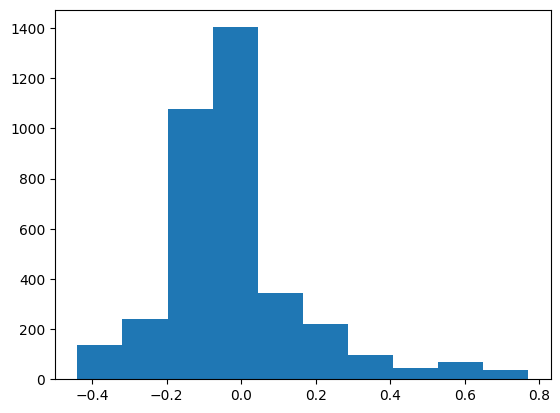

In [328]:
plt.hist(df_train_aug.comment_feat_2)